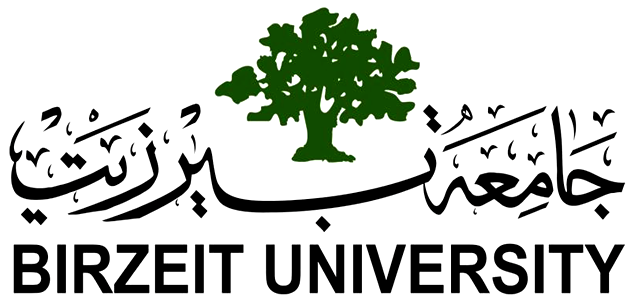

-------------------------------------------------------------------------
# **Faculty of Engineering and Technology**
# **Electrical and Computer Engineering Department**
**`COMPUTER VISION ‐ ENCS5343`**
# **Assignment # 1**
----------------------------------------------------

# **Prepared by:** Jehad Hamayel
# **ID:** 1200348
**Section number:** 1

**Instructor:** Dr. Aziz Qaroush

**Date & Place:** 17/12/2023, Masri204

-------------------------------
# Welcome to my Assignment
------------------------------

### **In the beginning, here I imported some of the Python offices needed for the program**

In [ ]:
import random
from PIL import Image
from IPython.display import display
import cv2
import numpy as np
from scipy.ndimage import uniform_filter , median_filter
from matplotlib import pyplot as plt

# **Quetsion#1**

## **1-Show and Open the 256x256 pixel image**

First, I downloaded the image, opened it, then converted it to 8 bit gray level and saved it

In [ ]:
#Open the image
path = '/content/tank.jpg'
image = Image.open(path)
# Convert the image to 8-bit gray-level
GrayLevelImage = image.convert("L")
# Save and display the 8-bit gray-level image
GrayLevelImage.save("/content/tankBW.jpg")
pathGrayLevelImage = '/content/tankBW.jpg'
imageGrayLevelImage_original = Image.open(pathGrayLevelImage)
imageGrayLevelImage_original.show()
display(imageGrayLevelImage_original)

As shown in the image above, it is an image of a tank with a size of 256 x 256 pixels with a type of 8bit gray level. This is the original image on which the operations required for this assignment will be performed.

## **2-Apply power law transformation with gamma = 0.4 to the image and show the image after the transformation.**

Here I performed the power law transform with gamma = 0.4 on the image and saved it

In [ ]:
#Applying a power law transform with gamma = 0.4 to the image
image=cv2.imread(pathGrayLevelImage)
r=image/255
c=255
gamma=0.4
#power law transformation
s=np.array(c*(r**gamma),dtype='uint8')
# Save and display the resulting image with power law transform
cv2.imwrite('/content/imageWithGamma0.4.jpg',s)
imageWithGamma = Image.open('/content/imageWithGamma0.4.jpg')
imageWithGamma.show()
display(imageWithGamma)

As shown in the result, the image has become brighter, and this is a function of the power law transform with gamma = 0.4, since gamma here is less than, which means maps a narrow range of dark input values into a wider range of output values, and this process makes the brightness increase.

image.png

This figure shows the process that obtained the input image when γ = 0.40 and L=256

## **3-Add a zero-mean Gaussian noise (with variance =40 gray-levels) to the original image and show the resulting image.**

Here I added zero-mean Gaussian noise with variance = 40 gray-levels

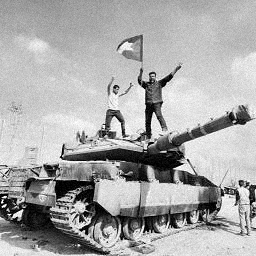

In [ ]:
# Add zero-mean Gaussian noise with variance = 40 gray-levels
imageGrayLevelImageArray = np.array(imageGrayLevelImage_original, dtype=np.float32)
mean=0
std = 40
segma= std ** 0.5
h,w=imageGrayLevelImageArray.shape
# Add noise to the image
noisy_image_array = imageGrayLevelImageArray + np.random.normal(mean, segma,(h,w))
# Clip pixel values to the valid range [0, 255]
noisyImageArrayClipped = np.clip(noisy_image_array, 0, 255)
# Convert the NumPy array back to an image
noisyImageWithZeroMeanGaussianNoise = Image.fromarray(np.uint8(noisyImageArrayClipped))
# Save and display the resulting image with Gaussian noise
noisyImageWithZeroMeanGaussianNoise.show()
display(noisyImageWithZeroMeanGaussianNoise)
noisyImageWithZeroMeanGaussianNoise.save("/content/noisyImageWithZeroMeanGaussianNoise.jpg")

As shown in the figure above, the original image has been added to it. Here I added zero-mean Gaussian noise with variance = 40 gray-levels, so that the image became distorted due to the Gaussian noise.

## **4- Apply a 5 by 5 mean filter to the noisy-image you obtained in point 3 above and show the result.**

Here I created a code that performs the 5 by 5 mean filter process to the noise-image resulting from the Gaussian noise that was added in the previous point.

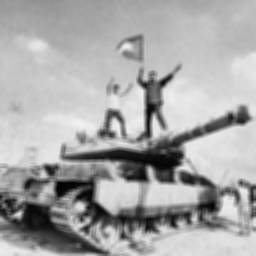

In [ ]:
#Applying a 5 by 5 mean filter to the Gaussian noisy-image above and show the result.
imageGrayLevelImageArray_MeanFilter = np.array(noisyImageWithZeroMeanGaussianNoise,dtype=np.uint8)
MeanFilterArray = uniform_filter(imageGrayLevelImageArray_MeanFilter,size=5) # 5 by 5 mean filter
MeanFilterImage = Image.fromarray(np.uint8(MeanFilterArray))
MeanFilterImage.show()
display(MeanFilterImage)
MeanFilterImage.save("/content/MeanFilterImage.jpg")

As shown in the figure above, the image is improved through the 5 by 5 mean filter, as this filter takes a kernel of size 5x5 and collects the values of neighboring pixels with the value of the pixels targeted for improvement and then divides them by their number. This process produces an improved image so that the image becomes smooth. More and it turns the image into a blurring image, as it is also used for noise reduction, as shown in the result: it reduces the noise.

## **5- Add salt and pepper noise (noise-density=0.1) to the original image and then apply a 7 by 7 median filter to the noisy-image and show both images.**

In the beginning, I added salt and pepper noise (noise-density=0.1) to the original image so that there was noise in order to study the median filter and the mean filter on the image and learn the effect of noise on each type of filters and how to deal with it.

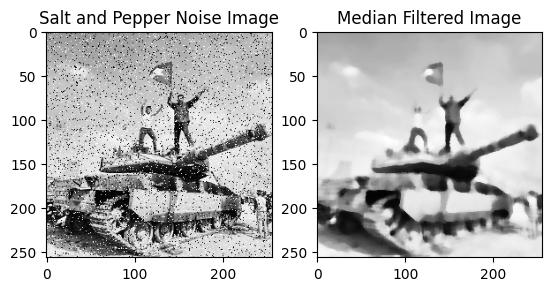

In [ ]:
#Adding salt and pepper noise (noise-density=0.1) to the original image and then apply a 7 by 7 median filter to the noisy-image and show both images
imageGrayLevelImage_originalArray=np.array(imageGrayLevelImage_original, dtype=np.uint8)
density=0.1
salt_and_pepper_noisy_imageArray = np.copy(imageGrayLevelImage_originalArray)
rows , colums = salt_and_pepper_noisy_imageArray.shape
numberOfPixels = int(((salt_and_pepper_noisy_imageArray.size * density) + 1)/2)
#Adding salt and pepper noise (noise-density=0.1) to the original image
for i in range(numberOfPixels):
    # Pick a random y coordinate from the original image
    y_Coordinate = random.randint(0, rows - 1)
    # Pick a random x coordinate from the original image
    x_Coordinate = random.randint(0, colums - 1)
    # Color that pixel to white(salt)
    if salt_and_pepper_noisy_imageArray[y_Coordinate][x_Coordinate] != 0 and \
            salt_and_pepper_noisy_imageArray[y_Coordinate][x_Coordinate] != 255:
        salt_and_pepper_noisy_imageArray[y_Coordinate][x_Coordinate] = 255
    else:
        i -= 1

for i in range(numberOfPixels):
    # Pick a random y coordinate from the original image
    y_Coordinate = random.randint(0, rows - 1)

    # Pick a random x coordinate from the original image
    x_Coordinate = random.randint(0, colums - 1)

    # Color that pixel to black(pepper)
    if salt_and_pepper_noisy_imageArray[y_Coordinate][x_Coordinate] != 0 and \
            salt_and_pepper_noisy_imageArray[y_Coordinate][x_Coordinate] != 255:
        salt_and_pepper_noisy_imageArray[y_Coordinate][x_Coordinate] = 0
    else:
        i -= 1

salt_and_pepper_noisy_image = Image.fromarray(np.uint8(salt_and_pepper_noisy_imageArray))
salt_and_pepper_noisy_image.save("/content/salt_and_pepper_noisy_image.jpg")
#Applying a 7 by 7 median filter to the noisy-image and show both images
median_filtered_salt_and_pepper_noisy_imageArray = median_filter(salt_and_pepper_noisy_imageArray, size=7)
median_filtered_salt_and_pepper_noisy_image = Image.fromarray(np.uint8(median_filtered_salt_and_pepper_noisy_imageArray))
plt.subplot(1, 2, 1), plt.imshow(salt_and_pepper_noisy_image, cmap='gray'), plt.title('Salt and Pepper Noise Image')
plt.subplot(1, 2, 2), plt.imshow(median_filtered_salt_and_pepper_noisy_image, cmap='gray'), plt.title('Median Filtered Image')
median_filtered_salt_and_pepper_noisy_image.save("/content/median_filtered_salt_and_pepper_noisy_image.jpg")
plt.show()

The figure above shows the original image with salt and pepper noise added to it and the improved image through the 7 by 7 median filter, where the pixel value is chosen by choosing the median from among the neighboring pixels in the kernel, and this type of filter is used for this type of noise. As it eliminates noise, as shown in the previous figure

## **6- Apply a 7 by 7 mean filter to the salt and pepper noisy-image and show the result.**

I created a code to make 7 by 7 Mean filter to the noisy-image to show how it works

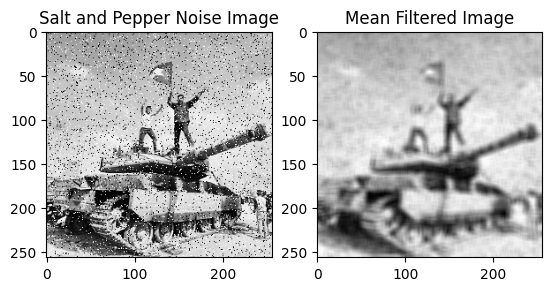

In [ ]:
#Applying a 7 by 7 Mean filter to the noisy-image
Mean_filtered_salt_and_pepper_noisy_imageArray = uniform_filter(salt_and_pepper_noisy_imageArray,size=7)
Mean_filtered_salt_and_pepper_noisy_image = Image.fromarray(np.uint8(Mean_filtered_salt_and_pepper_noisy_imageArray))
# show both images
plt.subplot(1, 2, 1), plt.imshow(salt_and_pepper_noisy_image, cmap='gray'), plt.title('Salt and Pepper Noise Image')
plt.subplot(1, 2, 2), plt.imshow(Mean_filtered_salt_and_pepper_noisy_image, cmap='gray'), plt.title('Mean Filtered Image')
Mean_filtered_salt_and_pepper_noisy_image.save("/content/Mean_filtered_salt_and_pepper_noisy_image.jpg")
plt.show()

How apparent in the result is that the mean filter blurring the image and this makes the noise stand out more as its working principle takes the mean between neighboring pixels and this makes the salt and pepper noise effect appear clearly and we conclude after this that the median filter is better than the mean filter because it treats The image is not on the principle of avarige, and we note that the media filter is less blurring.

## **7- Apply a Sobel filter to the original image and show the response.**

I created a code that performs the convolution process between the image and Sobel's kernel, where it initially performs zero padding of the image.

In [ ]:
#Convoluation Function
def Convoluation2Dimensions(originalImage,SobelKernel):

    sizeOfKernal = len(SobelKernel)
    padingSize = sizeOfKernal // 2
    PaddingTheOriginalImage=np.pad(originalImage, padingSize, mode='edge')
    resultOfConvoluation=np.zeros_like(originalImage)
    for x in range(originalImage.shape[0]):
        for y in range(originalImage.shape[1]):
            resultOfConvoluation[x,y] = np.sum(PaddingTheOriginalImage[x:x+sizeOfKernal,y:y+sizeOfKernal]*SobelKernel)

    return resultOfConvoluation

Sobel Edge Operators:

In [ ]:
SobelKernel_X =([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])
SobelKernel_Y =([[-1,0,1],[ -2, 0, 2],[ -1, 0, 1]])

The magnitude of the soble was taken and combined into one image

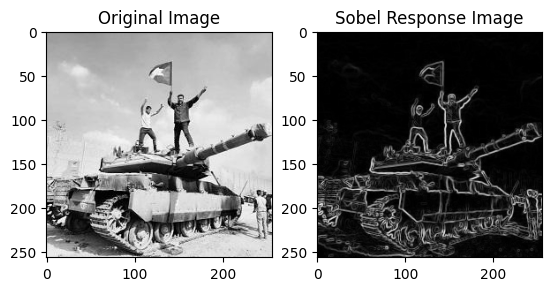

In [ ]:
imageGrayLevelImage_originalArray=np.array(imageGrayLevelImage_original, dtype=np.float32)
Gx = Convoluation2Dimensions(imageGrayLevelImage_originalArray, SobelKernel_X)
Gy = Convoluation2Dimensions(imageGrayLevelImage_originalArray, SobelKernel_Y)
SobelResponse = np.sqrt(Gx**2 + Gy**2)
#Normalisation of the data
SobelResponseImageArrayClipped = cv2.normalize(SobelResponse,None,0,255,cv2.NORM_MINMAX)
SobelResponse_image = Image.fromarray(np.uint8(SobelResponseImageArrayClipped))
plt.subplot(1, 2, 1), plt.imshow(imageGrayLevelImage_original, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(SobelResponse_image, cmap='gray'), plt.title('Sobel Response Image')
SobelResponse_image.save("/content/SobelResponse_image.jpg")
plt.show()

As shown in the picture, it is the process of edge detection through soble, as it identifies the edges of the image

# **Quetsion#2**

## A function has been written that convolves the image with the given convolution filter

In [ ]:
def myImageFilter(input_image, filter):
    sizeOfKernal = len(filter)
    padingSize = sizeOfKernal // 2

    PaddingTheOriginalImage = np.pad(input_image, padingSize, mode='edge')
    resultOfConvoluation = np.zeros_like(input_image)
    for x in range(input_image.shape[0]):
        for y in range(input_image.shape[1]):
            resultOfConvoluation[x, y] = np.sum(PaddingTheOriginalImage[x:x + sizeOfKernal, y:y + sizeOfKernal] * filter)

    return resultOfConvoluation

Upload the images that will be tested

In [ ]:
imageHouse1 = cv2.imread('House1.jpg', cv2.IMREAD_GRAYSCALE)
imageHouse2 = cv2.imread('House2.jpg', cv2.IMREAD_GRAYSCALE)

### **1- Averaging Kernel (3×3 and 5×5 )**

A function has been created that creates the Averaging Kernel Since the kernel is a ones

In [ ]:
def AveragingKernelGenerater(size):
    kernal = np.ones((size,size),dtype=np.float32)
    return kernal / (size * size)

Here are the kernel sizes that will be examined, which are 3x3 and 5x5

In [ ]:
averaging_kernel1 = AveragingKernelGenerater(3)
averaging_kernel2 = AveragingKernelGenerater(5)
filtered_image3x3 = myImageFilter(imageHouse1, averaging_kernel1)
filtered_image5x5 = myImageFilter(imageHouse1, averaging_kernel2)
filtered_image3x3 = Image.fromarray(np.uint8(filtered_image3x3))
filtered_image3x3.show()
display(filtered_image3x3)

**3x3 Kernel**

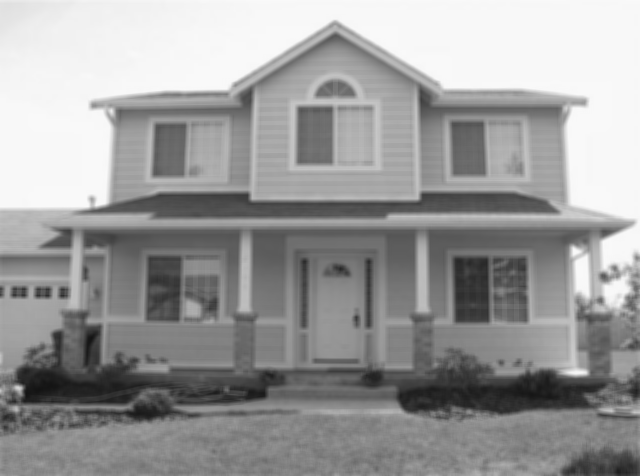

In [ ]:
filtered_image5x5 = Image.fromarray(np.uint8(filtered_image5x5))
filtered_image5x5.show()
display(filtered_image5x5)

**5x5 Kernel**

We notice that when the kernel was 3x3, the result was that the image was clearer than when the kernel was 5x5. The reason is that as the size of the kernel increases, the smoothing ratio becomes higher, and this makes the image dissolve more.

**Likewise, in the second picture, we notice the same thing (next picture)**

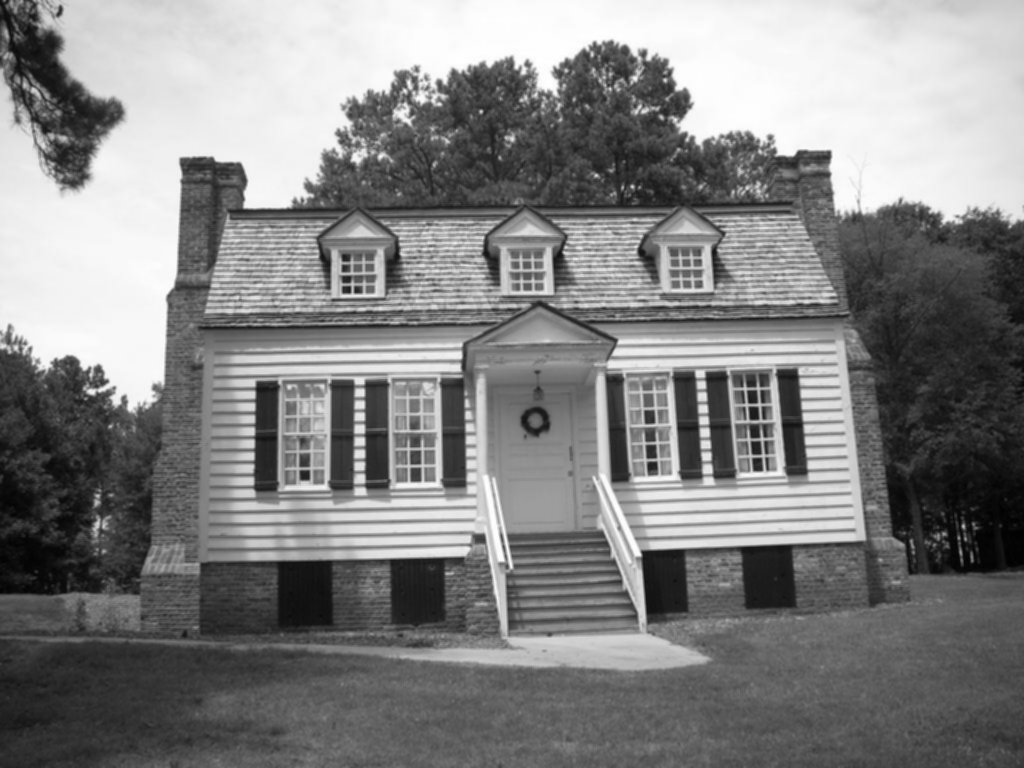

In [ ]:
filtered_image3x3 = myImageFilter(imageHouse2, averaging_kernel1)
filtered_image5x5 = myImageFilter(imageHouse2, averaging_kernel2)
filtered_image3x3 = Image.fromarray(np.uint8(filtered_image3x3))
filtered_image3x3.show()
display(filtered_image3x3)

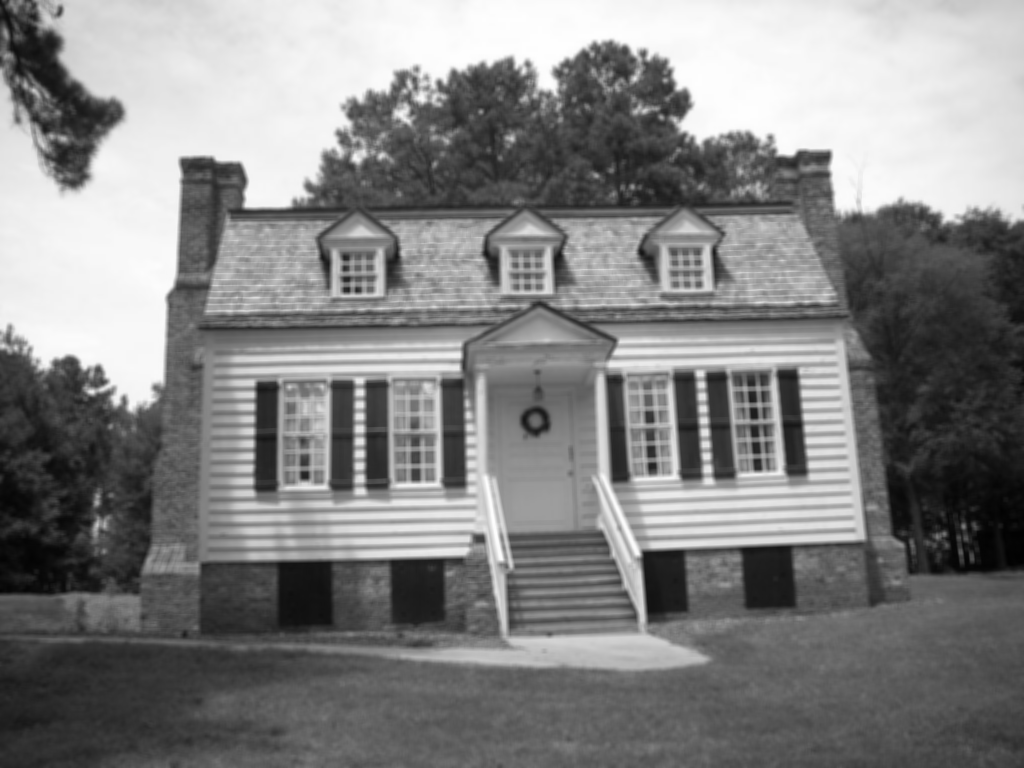

In [ ]:
filtered_image5x5 = Image.fromarray(np.uint8(filtered_image5x5))
filtered_image5x5.show()
display(filtered_image5x5)

### **2- Gaussian Kernel (σ = 1,2,3 ) with (2σ +1)×(2σ +1) as size of Kernel**

A function has been created that creates the Gaussian Kernel This equation was used to choose values for the kernel:
image.png


In [ ]:
def GaussianKernelGenerater(str):
    size =(2*std + 1)
    x, y = np.meshgrid(np.arange(-size // 2 + 1, size // 2 + 1), np.arange(-size // 2 + 1, size // 2 +1))
    kernel = (1/(2*np.pi*np.square(str)))*np.exp(-(x ** 2 + y ** 2) / (2 * str ** 2))
    return kernel / np.sum(kernel)

**Call the kernel making function and apply it to σ=1, 2, and 3 for first Image**

In [ ]:
gaussian_kernel = GaussianKernelGenerater(1)
filtered_image1 = myImageFilter(imageHouse1, gaussian_kernel)
gaussian_kernel = GaussianKernelGenerater(2)
filtered_image2 = myImageFilter(imageHouse1, gaussian_kernel)
gaussian_kernel = GaussianKernelGenerater(3)
filtered_image3 = myImageFilter(imageHouse1, gaussian_kernel)

**when σ = 1**

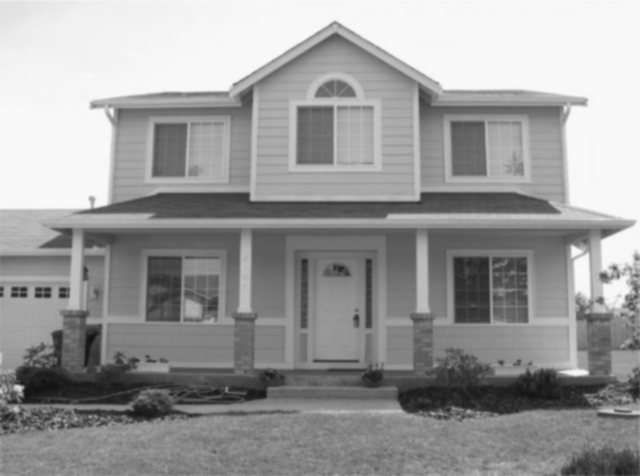

In [ ]:
filtered_image1 = Image.fromarray(np.uint8(filtered_image1))
filtered_image1.show()
display(filtered_image1)

**when σ = 2**

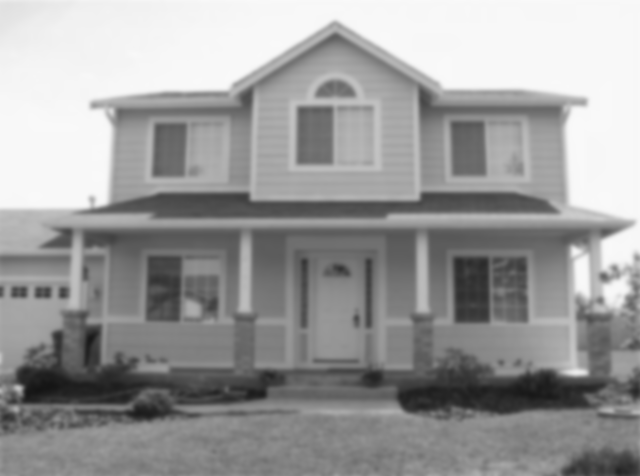

In [ ]:
filtered_image2 = Image.fromarray(np.uint8(filtered_image2))
filtered_image2.show()
display(filtered_image2)

**when σ = 3**

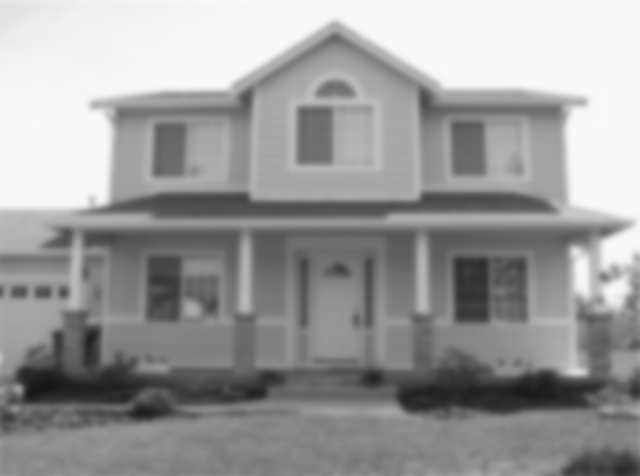

In [ ]:
filtered_image3 = Image.fromarray(np.uint8(filtered_image3))
filtered_image3.show()
display(filtered_image3)

We notice from the images that the larger the kernel size and the greater the standard deviation, the more smoothness the image has and the image features are lost. The same applies to the second image.

**Call the kernel making function and apply it to σ=1, 2, and 3 for second Image**

In [ ]:
gaussian_kernel = GaussianKernelGenerater(1)
filtered_image1 = myImageFilter(imageHouse2, gaussian_kernel)
gaussian_kernel = GaussianKernelGenerater(2)
filtered_image2 = myImageFilter(imageHouse2, gaussian_kernel)
gaussian_kernel = GaussianKernelGenerater(3)
filtered_image3 = myImageFilter(imageHouse2, gaussian_kernel)

**when σ = 1**

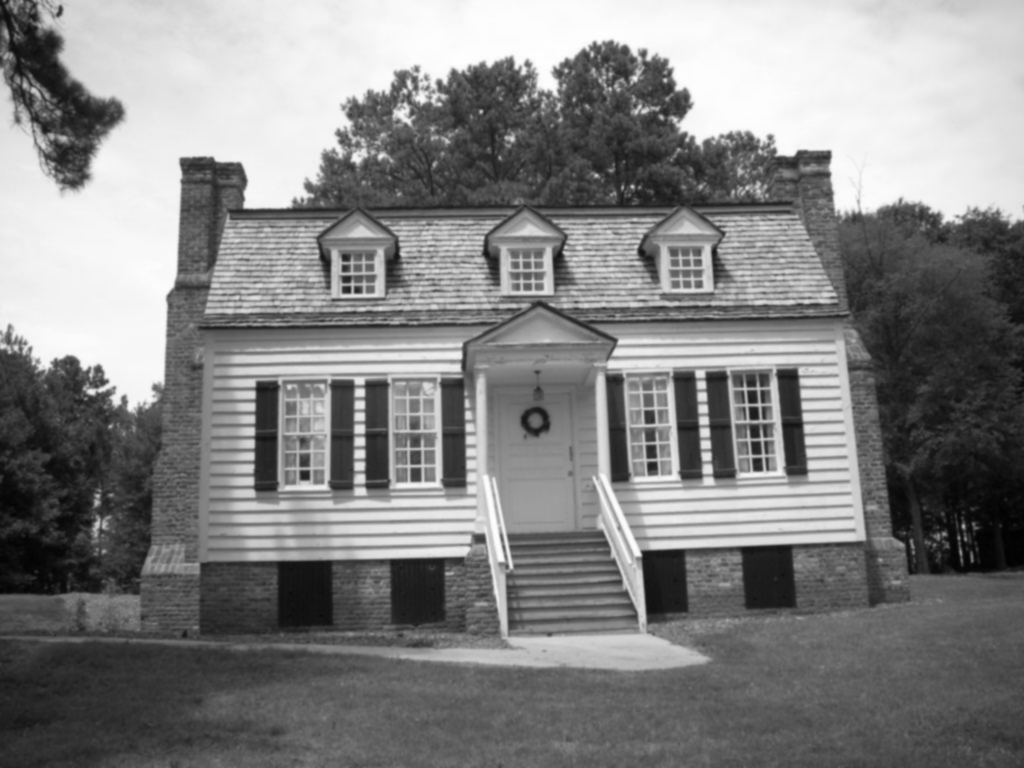

In [ ]:
filtered_image1 = Image.fromarray(np.uint8(filtered_image1))
filtered_image1.show()
display(filtered_image1)

**when σ = 2**

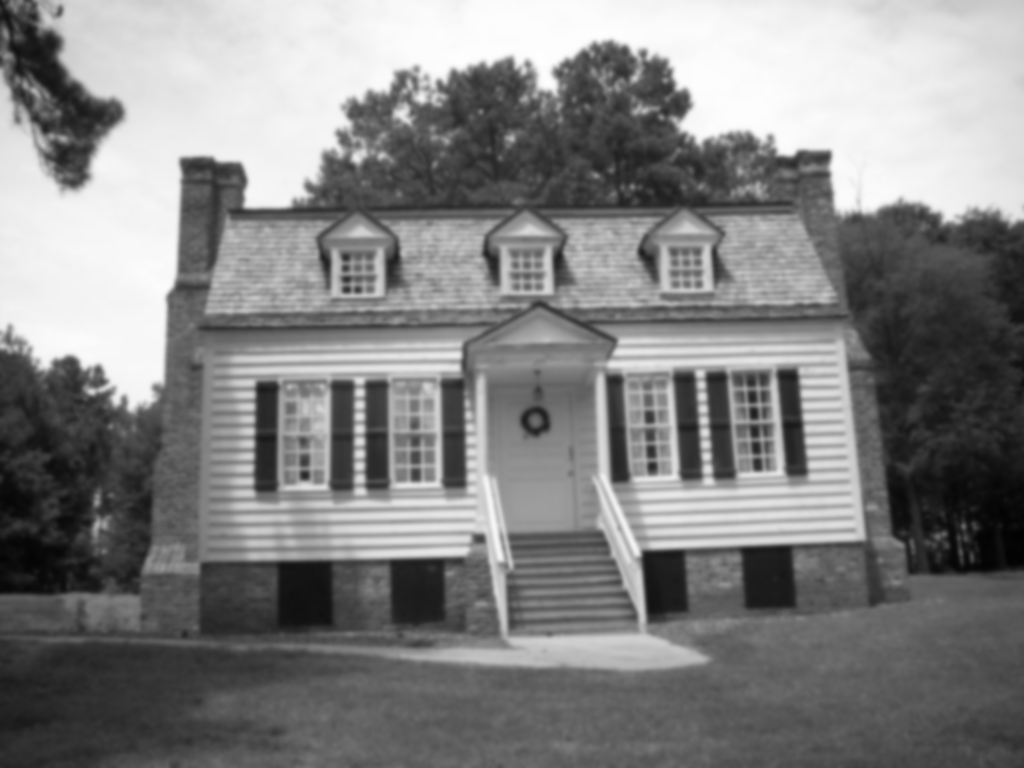

In [ ]:
filtered_image2 = Image.fromarray(np.uint8(filtered_image2))
filtered_image2.show()
display(filtered_image2)

**when σ = 3**

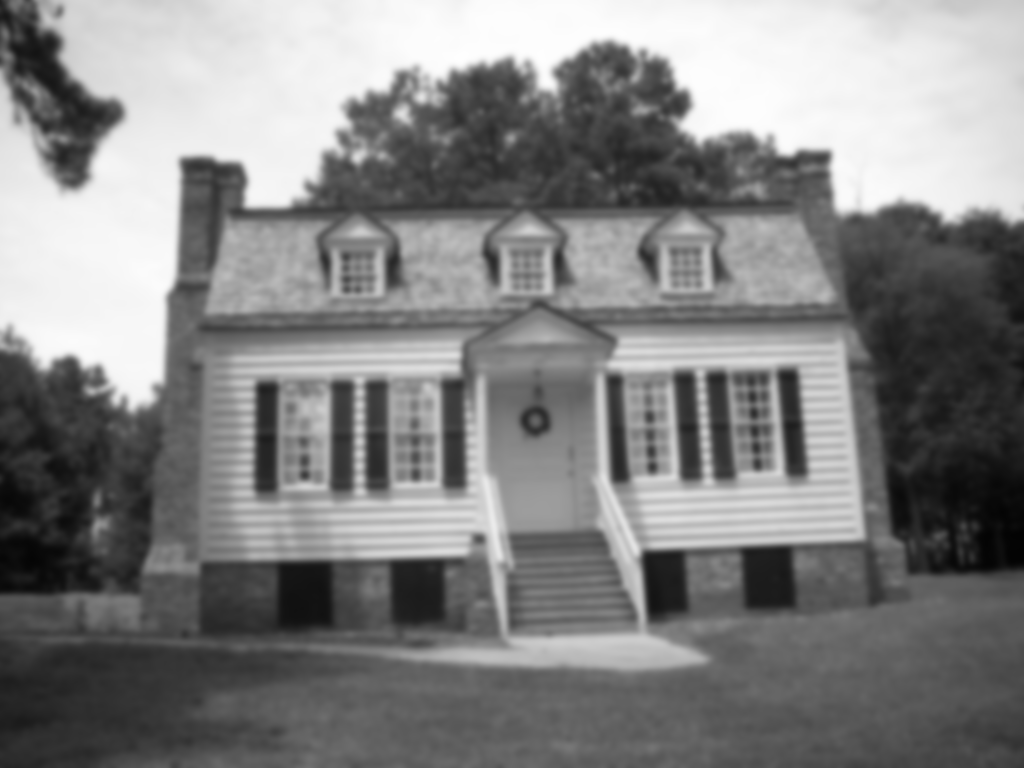

In [ ]:
filtered_image3 = Image.fromarray(np.uint8(filtered_image3))
filtered_image3.show()
display(filtered_image3)

We notice from the images that the larger the kernel size and the greater the standard deviation, the more smooth the image is and the image features are lost.

### **(3 + 4)- Sobel and Prewitt Edge Detection:**

**Sobel Kernel Operators Generater**

In [ ]:
def SobelKernelGenerater():
    SobelKernel_X = ([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    SobelKernel_Y = ([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    return SobelKernel_X,SobelKernel_Y

**Prewitt Kernel Operators Generater**

In [ ]:
def PrewittKernelGenerater():
    PrewittKernel_X = ([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    PrewittKernel_Y = ([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    return PrewittKernel_X,PrewittKernel_Y

**Sobel Filter function that generate the images:**

In [ ]:
def SobelFilter(imageHouse):
    SobelKernel_X,SobelKernel_Y = SobelKernelGenerater()
    imageHouse = np.array(imageHouse,dtype=np.float32)
    GX = myImageFilter(imageHouse, SobelKernel_X)
    GY = myImageFilter(imageHouse, SobelKernel_Y)

    magnitudeSoble = np.sqrt(GX**2 + GY**2)
    magnitudeSobleArray = cv2.normalize(magnitudeSoble,None,0,255,cv2.NORM_MINMAX)
    magnitudeSobleIemage = Image.fromarray(np.uint8(magnitudeSobleArray))
    magnitudeSobleIemage.show()
    display(magnitudeSobleIemage)
    return magnitudeSobleArray

**Prewitt Filter function that generate the images:**

In [ ]:
def PrewittFilter(imageHouse):
    PrewittKernel_X,PrewittKernel_Y = PrewittKernelGenerater()
    imageHouse = np.array(imageHouse,dtype=np.float32)
    GX = myImageFilter(imageHouse, PrewittKernel_X)
    GY = myImageFilter(imageHouse, PrewittKernel_Y)

    magnitudePrewitt = np.sqrt(GX**2 + GY**2)
    magnitudePrewittArray = cv2.normalize(magnitudePrewitt,None,0,255,cv2.NORM_MINMAX)
    magnitudePrewittIemage = Image.fromarray(np.uint8(magnitudePrewittArray))
    magnitudePrewittIemage.show()
    display(magnitudePrewittIemage)
    return magnitudePrewittArray

**Sobel Filter Of the first Image**

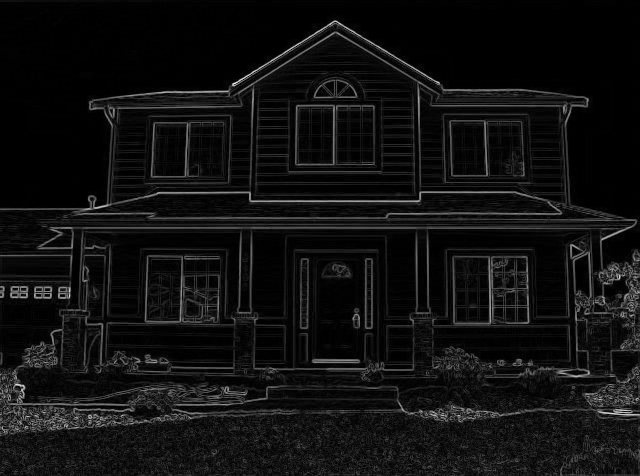

In [ ]:
magnitudeSobleIemage1 = SobelFilter(imageHouse1)

**Sobel Filter Of the first Image**

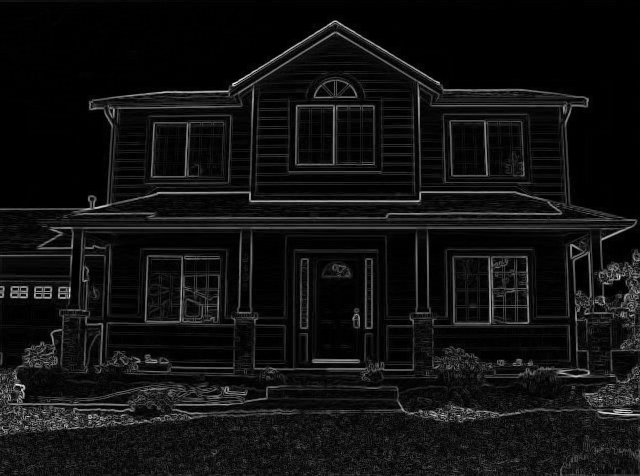

In [ ]:
magnitudePrewittIemage1 = PrewittFilter(imageHouse1)

**Subtract Prewitt Image from  Soble Image For first Image**

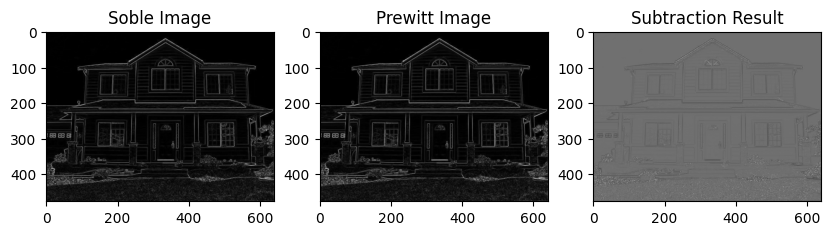

In [ ]:
# Subtract magnitudePrewittIemage from magnitudeSobleIemage
result = cv2.subtract(magnitudeSobleIemage1, magnitudePrewittIemage1)

# Display the original and subtracted images
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(magnitudeSobleIemage1, cmap='gray'), plt.title('Soble Image')
plt.subplot(132), plt.imshow(magnitudePrewittIemage1, cmap='gray'), plt.title('Prewitt Image')
plt.subplot(133), plt.imshow(result, cmap='gray'), plt.title('Subtraction Result')
plt.show()

As we can see from the previous images, it is a Soble Image whose edges are thicker and clearer because it is closer to the Gaussain.

**Sobel Filter Of the second Image**

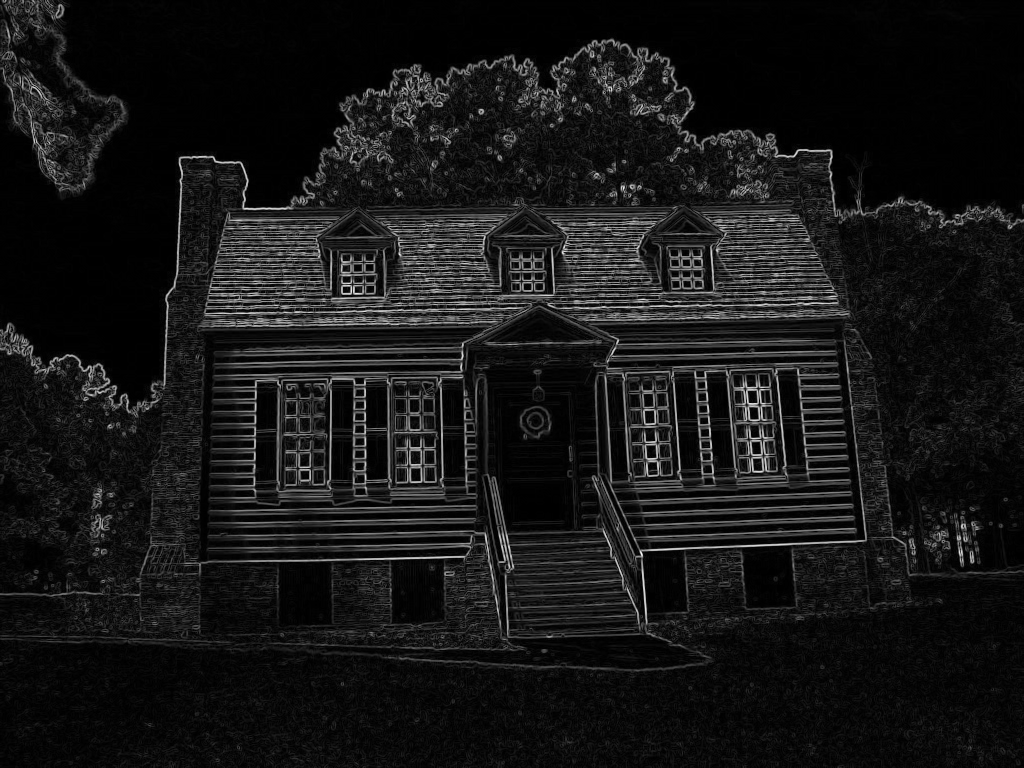

In [ ]:
magnitudeSobleIemage2 = SobelFilter(imageHouse2)

**Prewitt Filter Of the second Image**

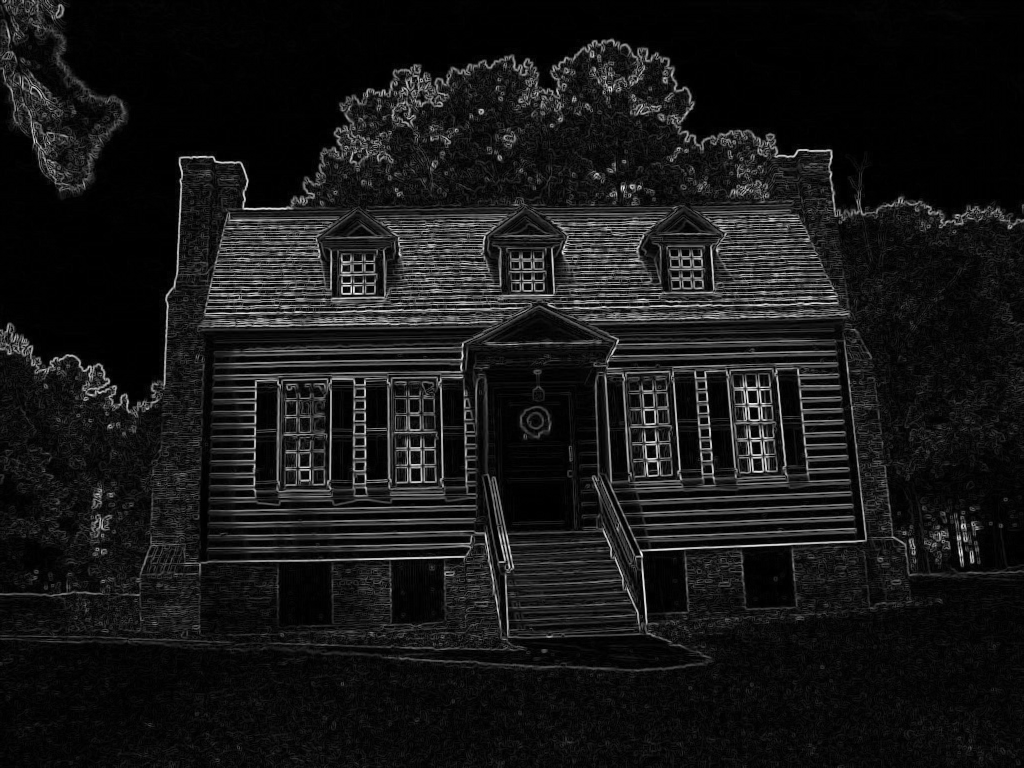

In [ ]:
magnitudePrewittIemage2 = PrewittFilter(imageHouse2)

**Subtract Prewitt Image from  Soble Image For second Image**

In [ ]:
# Subtract magnitudePrewittIemage from magnitudeSobleIemage
result = cv2.subtract(magnitudeSobleIemage2, magnitudePrewittIemage2)

# Display the original and subtracted images
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(magnitudeSobleIemage2, cmap='gray'), plt.title('Soble Image')
plt.subplot(132), plt.imshow(magnitudePrewittIemage2, cmap='gray'), plt.title('Prewitt Image')
plt.subplot(133), plt.imshow(result, cmap='gray'), plt.title('Subtraction Result')
plt.show()

As we can see from the previous images, it is a Soble Image whose edges are thicker and clearer because it is closer to the Gaussain.

# **Quetsion#3**

## Attached “Noisyimage1” and “Noisyimage2” are corrupted by salt and paper noise.Then apply 5 by 5 Averaging and Median filter and show the outputs.

**Open the first Image**

In [ ]:
Noisyimage1 = Image.open('/content/Noisyimage1.jpg')
Noisyimage1Array = np.array(Noisyimage1,dtype=np.uint8)

**Mean Filter**

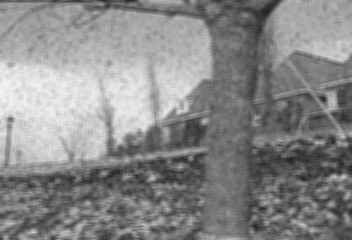

In [ ]:
MeanFilterArray = uniform_filter(Noisyimage1Array,size=5)
MeanFilterimage = Image.fromarray(np.uint8(MeanFilterArray))
MeanFilterimage.show()
display(MeanFilterimage)

**Median Filter**

In [ ]:
MedianFilterArray = median_filter(Noisyimage1Array, size=5)
MedianFilterimage = Image.fromarray(np.uint8(MedianFilterArray))
MedianFilterimage.show()
display(MedianFilterimage)

**Open the second Image**

In [ ]:
Noisyimage2 = Image.open('Noisyimage2.jpg')
Noisyimage2Array = np.array(Noisyimage2,dtype=np.uint8)

**Mean Filter**

In [ ]:
MeanFilterArray = uniform_filter(Noisyimage2Array,size=5)
MeanFilterimage = Image.fromarray(np.uint8(MeanFilterArray))
MeanFilterimage.show()
display(MeanFilterimage)

**Median Filter**

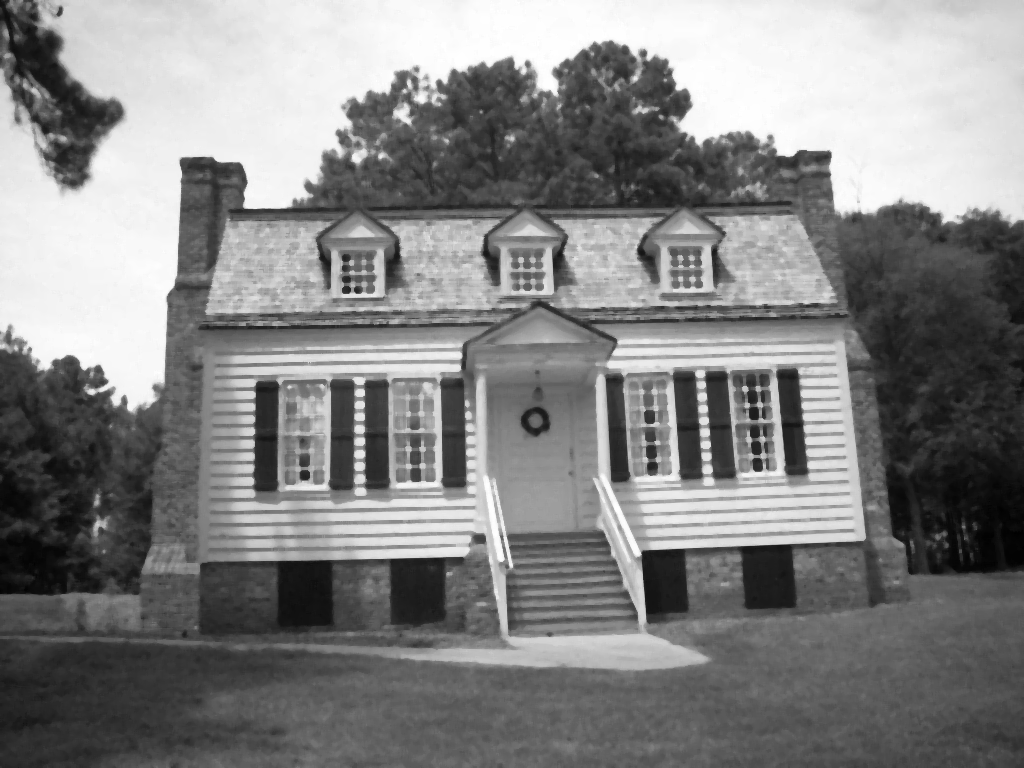

In [ ]:
MedianFilterArray = median_filter(Noisyimage2Array, size=5)
MedianFilterimage = Image.fromarray(np.uint8(MedianFilterArray))
MedianFilterimage.show()
display(MedianFilterimage)

As is clear from the pictures, the median filter is better than the mean filter because the median filter selects the pixel value by the median value of neighboring pixels, and this makes it ignore the noise in the image, and also because the median filter is less affected by outliers, and this makes it better at Solve noise problems such as processed images

# **Quetsion#4**

## **Compute gradient magnitude for attached image “Q4_Image” (using built-in sobel gradients function).**

### **1. Stretch the resulting magnitude (between 0 to 255) for better visualization**

In [ ]:
Q4Image = cv2.imread('Q_4.jpg', cv2.IMREAD_GRAYSCALE)

Gx= cv2.Sobel(Q4Image,cv2.CV_64F,1,0,ksize=3)
Gy= cv2.Sobel(Q4Image,cv2.CV_64F,0,1,ksize=3)

GMagnitude = np.sqrt(Gx**2 + Gy**2)
StretchedMagnitude = cv2.normalize(GMagnitude, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(10, 6))
plt.imshow(StretchedMagnitude, cmap='gray'), plt.title('Stretched Gradient Magnitude')
plt.show()

The figure shows the response to the soble for applying and defining the edges of the object in the image

### **2. Compute the histogram of gradient magnitude**

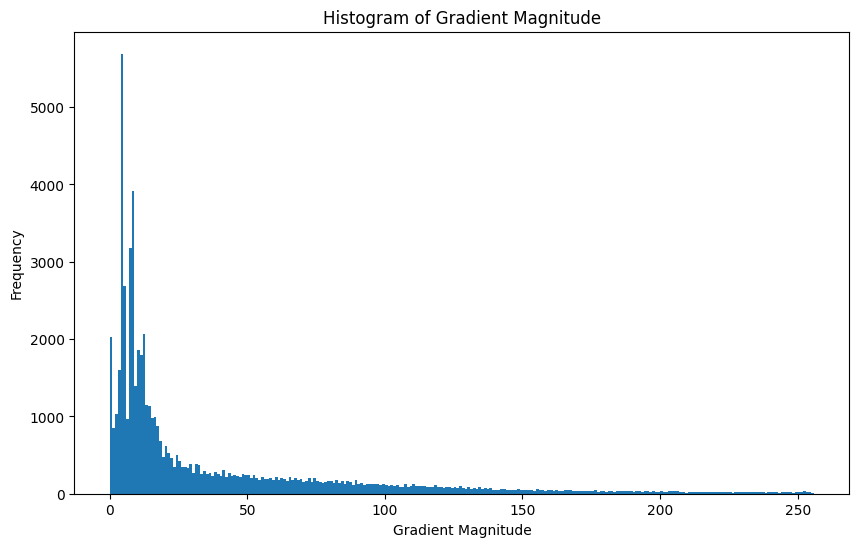

In [ ]:
# Compute and plot the histogram of gradient magnitude
plt.figure(figsize=(10, 6))
plt.hist(GMagnitude.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Gradient Magnitude')
plt.xlabel('Gradient Magnitude')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of pixel values, with grayscale being the color that is more prevalent than black, and the rest is defined by the edge

In [ ]:
# Compute gradient orientation
gradientOrientation = np.arctan2(Gy, Gx)
gradientOrientationNormalized = cv2.normalize(gradientOrientation, None, 0, 255, cv2.NORM_MINMAX)

plt.figure(figsize=(10, 6))
plt.imshow(gradientOrientationNormalized, cmap='gray'), plt.title('The Angle of Gradient Vector')
plt.show()

The previous figure shows the orientation of each pixel in the image

In [ ]:
# Compute and plot the histogram of gradient orientation
plt.figure(figsize=(8, 4))
plt.hist(gradientOrientationNormalized.ravel(), bins=36, range=[0, 2 * np.pi])
plt.title('Histogram of Gradient Orientation')
plt.xlabel('Gradient Orientation (Radians)')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of each pixel and its orientation

# **Quetsion#5**

## Load walk_1.jpg and walk_2.jpg images in Python. Convert them to gray scale and subtract walk_2.jpg from walk_1.jpg.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 1]
 [1 1 0 ... 1 0 1]]


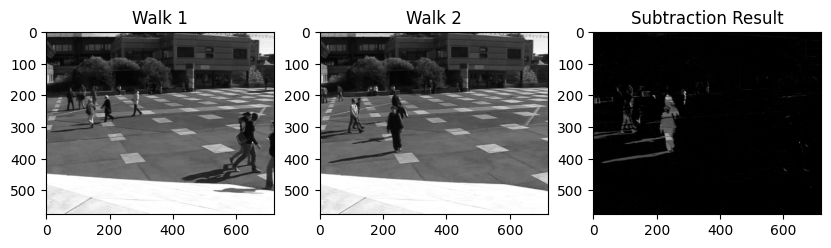

In [ ]:
walk_1Image = cv2.imread('walk_1.jpg', cv2.IMREAD_GRAYSCALE)
walk_2Image = cv2.imread('walk_2.jpg', cv2.IMREAD_GRAYSCALE)
# Subtract walk_2 from walk_1
result = cv2.subtract(walk_1Image, walk_2Image)
print(result)
# Display the original and subtracted images
plt.figure(figsize=(10, 5))
plt.subplot(131), plt.imshow(walk_1Image, cmap='gray'), plt.title('Walk 1')
plt.subplot(132), plt.imshow(walk_2Image, cmap='gray'), plt.title('Walk 2')
plt.subplot(133), plt.imshow(result, cmap='gray'), plt.title('Subtraction Result')
plt.show()

The pixel values of walk_2.jpg are subtracted from walk_1.jpg. The differences between the two pictures are visible. Values of 1 in the image indicate areas where walk_1.jpg is brighter than walk_2.jpg, and values of 0 indicate areas where walk_1.jpg is less bright than walk_2.jpg.

# **Quetsion#6**

## Apply canny edge detector on the “Q_4.jpg” using OpenCV function “Canny”. Test different values of ‘Threshold’.

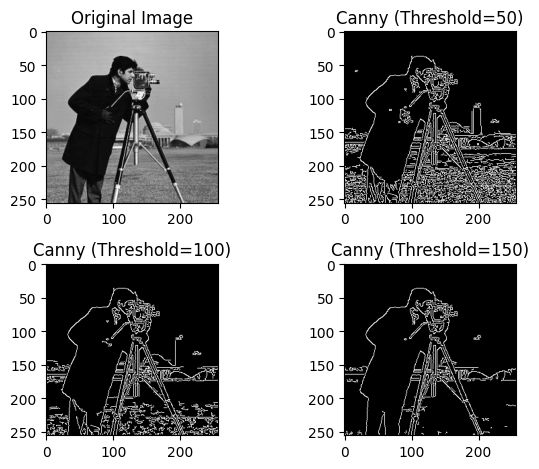

In [ ]:
# Load the image
Q4image = cv2.imread('Q_4.jpg', cv2.IMREAD_GRAYSCALE)
# Apply Canny edge detector with different threshold values
thresholds = [50, 100, 150]  # You can experiment with different threshold values

plt.subplot(2, 2, 1), plt.imshow(Q4image, cmap='gray'), plt.title('Original Image')
# Apply Canny for different threshold values
edges = cv2.Canny(Q4image, thresholds[0], thresholds[0] * 2)
plt.subplot(2, 2, 2), plt.imshow(edges, cmap='gray'), plt.title(f'Canny (Threshold={thresholds[0]})')
edges = cv2.Canny(Q4image, thresholds[1], thresholds[1] * 2)
plt.subplot(2, 2, 3), plt.imshow(edges, cmap='gray'), plt.title(f'Canny (Threshold={thresholds[1]})')
edges = cv2.Canny(Q4image, thresholds[2], thresholds[2] * 2)
plt.subplot(2, 2, 4), plt.imshow(edges, cmap='gray'), plt.title(f'Canny (Threshold={thresholds[2]})')
plt.tight_layout()
plt.show()

The previous figure shows a test of more than one Threshhold for Canny, and the more Threshhold increases, the less detail of the edges appears